In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib as mp

In [4]:
#Import Complete dataset and View columns
df = pd.read_csv("CompleteDataset.csv")
df.columns

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [5]:
#Only use some features
df=df[['Name','Age','Overall','Potential','Club','Value','Wage','Preferred Positions']]
df.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,92,92,FC Bayern Munich,€61M,€230K,GK


In [6]:
#Calculate remaining potential. This can help us in the future to find trends in wage and value of the players
df['Remaining Potential'] = df['Potential'] - df['Overall']
df.head()


,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Positions,Remaining Potential
0,Cristiano Ronaldo,32,94,94,Real Madrid CF,€95.5M,€565K,ST LW,0
1,L. Messi,30,93,93,FC Barcelona,€105M,€565K,RW,0
2,Neymar,25,92,94,Paris Saint-Germain,€123M,€280K,LW,2
3,L. Suárez,30,92,92,FC Barcelona,€97M,€510K,ST,0
4,M. Neuer,31,92,92,FC Bayern Munich,€61M,€230K,GK,0


In [7]:
#Only select one of the preferred positions of the players
df['Preferred Positions']= df['Preferred Positions'].str.split().str[0]
df.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Positions,Remaining Potential
0,Cristiano Ronaldo,32,94,94,Real Madrid CF,€95.5M,€565K,ST,0
1,L. Messi,30,93,93,FC Barcelona,€105M,€565K,RW,0
2,Neymar,25,92,94,Paris Saint-Germain,€123M,€280K,LW,2
3,L. Suárez,30,92,92,FC Barcelona,€97M,€510K,ST,0
4,M. Neuer,31,92,92,FC Bayern Munich,€61M,€230K,GK,0


In [8]:
#Convert the wage and value into a floating point number
df['Unit']=df['Value'].str[-1]
df['Unit']

0        M
1        M
2        M
3        M
4        M
5        M
6        M
7        M
8        M
9        M
10       M
11       M
12       M
13       M
14       M
15       M
16       M
17       M
18       M
19       M
20       M
21       M
22       M
23       M
24       M
25       M
26       M
27       M
28       M
29       M
        ..
17951    K
17952    K
17953    K
17954    K
17955    K
17956    K
17957    K
17958    K
17959    K
17960    K
17961    K
17962    K
17963    K
17964    K
17965    K
17966    K
17967    K
17968    K
17969    K
17970    K
17971    K
17972    K
17973    K
17974    K
17975    K
17976    K
17977    0
17978    K
17979    K
17980    K
Name: Unit, Length: 17981, dtype: object

In [9]:
df['Value(M)']=np.where(df['Unit']=='0',0,df['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
df['Value(M)']

0        95.5
1         105
2         123
3          97
4          61
5          92
6        64.5
7        90.5
8          79
9          77
10         52
11         83
12         59
13       67.5
14         57
15       69.5
16       66.5
17         38
18        4.5
19         79
20         57
21         75
22       70.5
23         61
24         44
25         48
26         40
27         48
28         60
29         38
         ... 
17951      40
17952      60
17953      60
17954      60
17955      60
17956      50
17957      50
17958      40
17959      60
17960      70
17961      60
17962      50
17963      50
17964      60
17965      60
17966      60
17967      60
17968      60
17969      60
17970      40
17971      60
17972      60
17973      50
17974      40
17975      30
17976      50
17977       0
17978      60
17979      60
17980      50
Name: Value(M), Length: 17981, dtype: object

In [0]:
df['Value(M)']=df['Value(M)'].astype(float)
df['Value(M)']=np.where(df['Unit']=='M',df['Value(M)'],df['Value(M)']/1000)
df=df.drop('Unit',1)

In [11]:
df['Unit(K)']=df['Wage'].str[-1]
df['Unit(K)']
df['Wage(K)']=np.where(df['Unit(K)']=='0',0,df['Wage'].str[1:-1].replace(r'[a-zA-Z]',''))
df['Wage(K)']

0        565
1        565
2        280
3        510
4        230
5        355
6        215
7        295
8        340
9        275
10       310
11       285
12       190
13       265
14       340
15       370
16       325
17       225
18       110
19       215
20        82
21       150
22       225
23       165
24       210
25       215
26       125
27       215
28       265
29       165
        ... 
17951      1
17952      1
17953      1
17954      1
17955      1
17956      1
17957      1
17958      1
17959      1
17960      1
17961      5
17962      1
17963      1
17964      1
17965      1
17966      1
17967      1
17968      1
17969      1
17970      1
17971      2
17972      1
17973      1
17974      1
17975      1
17976      1
17977      1
17978      1
17979      1
17980      1
Name: Wage(K), Length: 17981, dtype: object

In [0]:
df['Wage(K)']=df['Wage(K)'].astype(float)
df=df.drop('Unit(K)',1)

In [13]:
df.head(10)

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Positions,Remaining Potential,Value(M),Wage(K)
0,Cristiano Ronaldo,32,94,94,Real Madrid CF,€95.5M,€565K,ST,0,95.5,565.0
1,L. Messi,30,93,93,FC Barcelona,€105M,€565K,RW,0,105.0,565.0
2,Neymar,25,92,94,Paris Saint-Germain,€123M,€280K,LW,2,123.0,280.0
3,L. Suárez,30,92,92,FC Barcelona,€97M,€510K,ST,0,97.0,510.0
4,M. Neuer,31,92,92,FC Bayern Munich,€61M,€230K,GK,0,61.0,230.0
5,R. Lewandowski,28,91,91,FC Bayern Munich,€92M,€355K,ST,0,92.0,355.0
6,De Gea,26,90,92,Manchester United,€64.5M,€215K,GK,2,64.5,215.0
7,E. Hazard,26,90,91,Chelsea,€90.5M,€295K,LW,1,90.5,295.0
8,T. Kroos,27,90,90,Real Madrid CF,€79M,€340K,CDM,0,79.0,340.0
9,G. Higuaín,29,90,90,Juventus,€77M,€275K,ST,0,77.0,275.0


In [0]:
df=df[['Name','Age','Overall','Potential','Remaining Potential','Club','Value(M)','Wage(K)','Preferred Positions']]


In [15]:
df.head(10)

,Name,Age,Overall,Potential,Remaining Potential,Club,Value(M),Wage(K),Preferred Positions
0,Cristiano Ronaldo,32,94,94,0,Real Madrid CF,95.5,565.0,ST
1,L. Messi,30,93,93,0,FC Barcelona,105.0,565.0,RW
2,Neymar,25,92,94,2,Paris Saint-Germain,123.0,280.0,LW
3,L. Suárez,30,92,92,0,FC Barcelona,97.0,510.0,ST
4,M. Neuer,31,92,92,0,FC Bayern Munich,61.0,230.0,GK
5,R. Lewandowski,28,91,91,0,FC Bayern Munich,92.0,355.0,ST
6,De Gea,26,90,92,2,Manchester United,64.5,215.0,GK
7,E. Hazard,26,90,91,1,Chelsea,90.5,295.0,LW
8,T. Kroos,27,90,90,0,Real Madrid CF,79.0,340.0,CDM
9,G. Higuaín,29,90,90,0,Juventus,77.0,275.0,ST


In [0]:
#Get the best squad, Check if position is in the formation list and if that player's overall is maximum for that position, he gets added to the best team
def get_best_squad(position):
    df_copy = df.copy()
    store = []
    for i in position:
        store.append([i,df_copy.loc[[df_copy[df_copy['Preferred Positions'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), df_copy[df_copy['Preferred Positions'] == i]['Overall'].max()])
        df_copy.drop(df_copy[df_copy['Preferred Positions'] == i]['Overall'].idxmax(), inplace = True)
    #return store
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

In [17]:
#You can try out different formations. 
formation_433 = ['GK','LB','CB','CB','RB','LM','CDM','RM','LW','ST','RW']
print('Best Squad for the 4-3-3 formation')
print(get_best_squad(formation_433))

Best Squad for the 4-3-3 formation
Position             Player Overall
     GK           M. Neuer      92
     LB            Marcelo      87
     CB       Sergio Ramos      90
     CB       G. Chiellini      89
     RB           Carvajal      84
     LM         C. Eriksen      87
    CDM           T. Kroos      90
     RM       K. De Bruyne      89
     LW             Neymar      92
     ST  Cristiano Ronaldo      94
     RW           L. Messi      93


In [0]:
def get_worst_squad(position):
    df_copy = df.copy()
    store = []
    for i in position:
        store.append([i,df_copy.loc[[df_copy[df_copy['Preferred Positions'] == i]['Overall'].idxmin()]]['Name'].to_string(index = False), df_copy[df_copy['Preferred Positions'] == i]['Overall'].min()])
        df_copy.drop(df_copy[df_copy['Preferred Positions'] == i]['Overall'].idxmin(), inplace = True)
    #return store
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

In [19]:
formation_433 = ['GK','LB','CB','CB','RB','LM','CDM','RM','LW','ST','RW']
print('Worst Squad for the 4-3-3 formation')
df_worst = get_worst_squad(formation_433)
print(df_worst)


Worst Squad for the 4-3-3 formation
Position        Player Overall
     GK     A. Kelsey      46
     LB     E. Hughes      48
     CB     J. Keeble      46
     CB     C. Rogers      47
     RB    D. Peppard      47
     LM     E. Hudson      48
    CDM        H. Mae      49
     RM     C. Nugent      48
     LW      E. Hodge      51
     ST      J. Young      46
     RW  O. Dzonlagic      49


In [20]:

formation_41212=['GK','LB','CB','CB','RB','LM','CDM','CAM','RM','ST','ST']
print(get_best_squad(formation_41212))

Position             Player Overall
     GK           M. Neuer      92
     LB            Marcelo      87
     CB       Sergio Ramos      90
     CB       G. Chiellini      89
     RB           Carvajal      84
     LM         C. Eriksen      87
    CDM           T. Kroos      90
    CAM           Coutinho      86
     RM       K. De Bruyne      89
     ST  Cristiano Ronaldo      94
     ST          L. Suárez      92


In [21]:
#age and potential

df_p=df.groupby(['Age'])['Potential'].mean()
df_p

Age
16    76.538462
17    73.492248
18    72.654762
19    72.815716
20    72.717269
21    72.790047
22    72.542296
23    72.489957
24    72.090705
25    70.836399
26    70.574875
27    69.697917
28    69.304472
29    69.763604
30    69.853234
31    69.767511
32    69.468379
33    69.709887
34    68.911765
35    69.151832
36    69.080882
37    68.536232
38    68.666667
39    67.900000
40    67.625000
41    64.333333
43    55.000000
44    70.500000
47    46.000000
Name: Potential, dtype: float64

In [22]:
df_o = df.groupby(['Age'])['Overall'].mean()
df_o

Age
16    57.846154
17    56.089147
18    57.287202
19    59.430309
20    61.559839
21    63.395023
22    64.762085
23    66.117647
24    67.182909
25    68.008541
26    68.643927
27    68.943576
28    69.058040
29    69.722569
30    69.847015
31    69.767511
32    69.468379
33    69.709887
34    68.911765
35    69.151832
36    69.080882
37    68.536232
38    68.666667
39    67.900000
40    67.625000
41    64.333333
43    55.000000
44    70.500000
47    46.000000
Name: Overall, dtype: float64

In [23]:
df_summary = pd.concat([df_p, df_o], axis=1)
df_summary


,Potential,Overall
Age,,
16,76.538462,57.846154
17,73.492248,56.089147
18,72.654762,57.287202
19,72.815716,59.430309
20,72.717269,61.559839
21,72.790047,63.395023
22,72.542296,64.762085
23,72.489957,66.117647
24,72.090705,67.182909


This shows that a player will meet his potential Rating when he is between the ages of 27-30


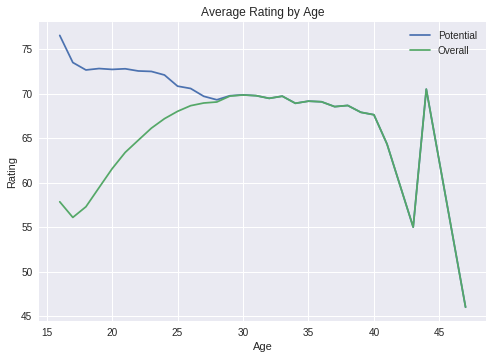

In [24]:
#Observation found between age and potential
ax = df_summary.plot()
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Age')
print('This shows that a player will meet his potential Rating when he is between the ages of 27-30')

In [0]:
def get_best_squad(position, club = '*', measurement = 'Overall'):
    df_copy = df.copy()
    df_copy = df_copy[df_copy['Club'] == club]
    store = []
    for i in position:
        store.append([df_copy.loc[[df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax()]]['Preferred Positions'].to_string(index = False),
                      df_copy.loc[[df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
                      df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].max(), 
                      float(df_copy.loc[[df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax()]]['Value(M)'].to_string(index = False))])
        df_copy.drop(df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax(), inplace = True)
    #return store
    return np.mean([x[2] for x in store]).round(1), pd.DataFrame(np.array(store).reshape(11,4), columns = ['Position', 'Player', measurement, 'Value(M)']).to_string(index = False), np.sum([x[3] for x in store]).round(1)

In [26]:
#Shows you the Best formation and budget for that formation for a given club along with the average rating of that team.

squad_352_strict = ['GK', 'LB|LWB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$']
squad_442_strict = ['GK', 'LB|LWB', 'CB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$']
squad_433_strict = ['GK', 'LB|LWB', 'CB', 'CB', 'RB|RWB', 'CM|LM|W$', 'CM|RM|W$', 'CM|CAM|CDM', 'W$|T$', 'W$|T$', 'W$|T$']
squad_343_strict = ['GK', 'LB|LWB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM|CAM|CDM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$', 'W$|T$']
#squad_532_strict = ['GK', 'LB|LWB', 'CB|LWB|RWB', 'CB|LWB|RWB', 'CB|LWB|RWB', 'RB|RWB', 'M$|W$', 'M$|W$', 'M$|W$', 'W$|T$', 'W$|T$']


formations = [squad_352_strict, squad_442_strict, squad_433_strict, squad_343_strict]
squad_name = ['3-5-2', '4-4-2', '4-3-3', '3-4-3']

club = input()
for i in range (len(formations)):
  rating_Overall, best_list_Overall, value_Overall = get_best_squad(formations[i], club, 'Overall')
  rating_Potential, best_list_Potential, value_Potential  = get_best_squad(formations[i], club, 'Potential')
  print("Club = ",club.upper())
  print("FORMATION : ",squad_name[i])
  print('-Overall-')
  print('Average rating: {:.1f}'.format(rating_Overall))
  print('Total Value (M): {:.1f}'.format(value_Overall))
  print(best_list_Overall)

  print('-Potential-')
  print('Average rating: {:.1f}'.format(rating_Potential))
  print('Total Value (M): {:.1f}'.format(value_Potential))
  print(best_list_Potential)

  print("--------------------------------------------------------------------")
  
      

Manchester City
Club =  MANCHESTER CITY
FORMATION :  3-5-2
-Overall-
Average rating: 83.6
Total Value (M): 382.0
Position         Player Overall Value(M)
     GK        Ederson      83     26.0
    LWB       B. Mendy      78     13.0
     CB     V. Kompany      85     26.0
    RWB      K. Walker      83     24.0
     LM    David Silva      87     44.0
     RM   K. De Bruyne      89     83.0
     CM       F. Delph      77     10.0
    CDM    I. Gündoğan      85     46.0
    CDM       Y. Touré      83     12.5
     ST      S. Agüero      89     66.5
     ST  Gabriel Jesus      81     31.0
-Potential-
Average rating: 87.0
Total Value (M): 361.1
Position         Player Potential Value(M)
     GK        Ederson        89     26.0
    LWB       B. Mendy        86     13.0
     CB     V. Kompany        85     26.0
    RWB      K. Walker        84     24.0
     LM        L. Sané        91     34.5
     RM   K. De Bruyne        92     83.0
     CM       F. Delph        78     10.0
    CDM    I.

In [27]:
squad_generic = ['GK', 'B$', 'B$', 'B$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'W$|T$|M$', 'W$|T$|M$']


By_club = df.groupby(['Club'])['Overall'].mean()

def get_summary(squad):
    OP = []
    # only get top 100 clubs for shorter run-time
    for i in By_club.sort_values(ascending = False).index[0:100]:
        # for overall rating
        O_temp_rating, _, _  = get_best_squad(squad, club = i, measurement = 'Overall')
        # for potential rating & corresponding value
        P_temp_rating, _, P_temp_value = get_best_squad(squad, club = i, measurement = 'Potential')
        OP.append([i, O_temp_rating, P_temp_rating, P_temp_value])
    return OP

OP_df = pd.DataFrame(np.array(get_summary(squad_generic)).reshape(-1,4), columns = ['Club', 'Overall', 'Potential', 'Value of highest Potential squad'])
OP_df.set_index('Club', inplace = True)
OP_df = OP_df.astype(float)


print (OP_df.head(100))

                          Overall  Potential  Value of highest Potential squad
Club                                                                          
FC Barcelona                 86.5       89.0                             504.0
Juventus                     86.4       87.9                             386.0
Real Madrid CF               87.8       89.7                             606.5
FC Bayern Munich             87.5       89.0                             554.5
Paris Saint-Germain          85.3       88.5                             440.0
Manchester United            85.1       88.6                             376.5
Napoli                       82.7       85.5                             269.5
Roma                         82.3       84.5                             239.5
Sevilla FC                   80.7       82.7                             188.0
Inter                        81.5       85.4                             210.4
Chelsea                      85.9       88.1        

Enter Budget in M (300M-700M)
500


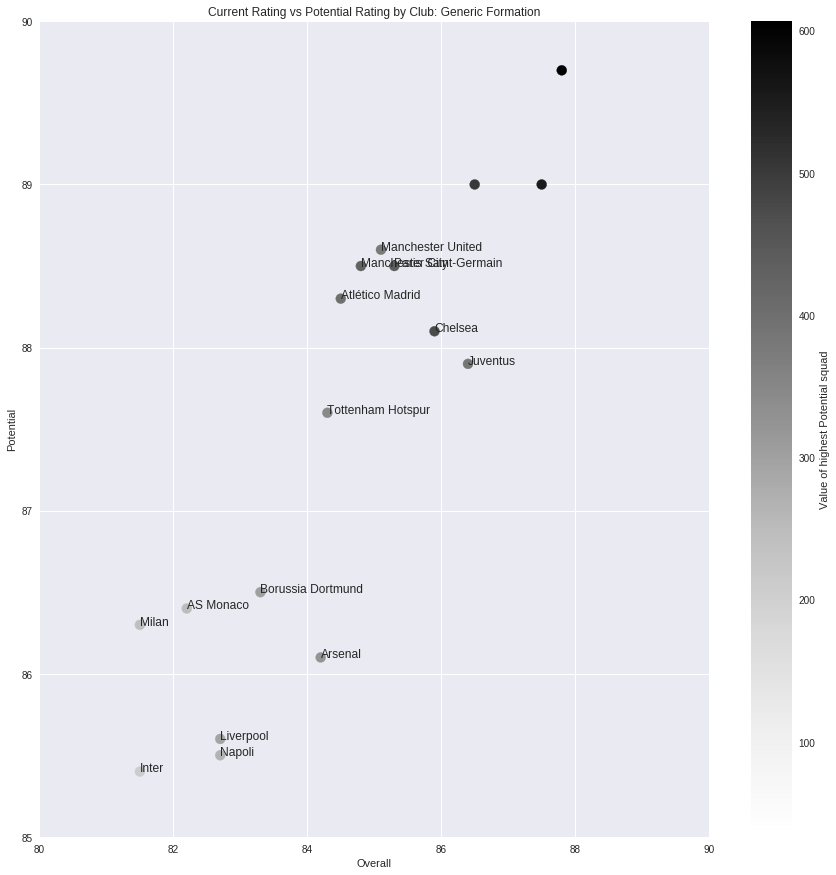

In [28]:
# Finding strong clubs with relatively low value
#Supposed we have 350M to buy a club with existing squad and are interested in club with at least 85 potential ratings,then we should probably go for Tottenham Hotspur, and Aresenal is relatively a bad choice. 
import matplotlib.pyplot as plt
print("Enter Budget in M (300M-700M)")
budget=int(input())
fig, ax = plt.subplots()
OP_df.plot(kind = 'scatter', x = 'Overall', y = 'Potential', c = 'Value of highest Potential squad', s = 100, figsize = (15,15), xlim = (80, 90), ylim = (85, 90), title = 'Current Rating vs Potential Rating by Club: Generic Formation', ax = ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
       
OP_df['Club_label'] = OP_df.index

OP_df_sub = OP_df[(OP_df['Potential']>=85) & (OP_df['Value of highest Potential squad']<=budget)]

label_point(OP_df_sub['Overall'], OP_df_sub['Potential'], OP_df_sub['Club_label'], ax)


In [29]:
data=pd.read_csv('CompleteDataset.csv')
data['Preferred Positions']= data['Preferred Positions'].str.split().str[0]
data['Preferred Positions']


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0         ST
1         RW
2         LW
3         ST
4         GK
5         ST
6         GK
7         LW
8        CDM
9         ST
10        CB
11        RM
12        GK
13        RM
14       CDM
15        RW
16        ST
17        CB
18        GK
19        ST
20        GK
21        LW
22       CDM
23        ST
24        CB
25        CB
26        CB
27        CB
28        RW
29        GK
        ... 
17951     GK
17952     CM
17953     RB
17954     LM
17955     CM
17956     CB
17957     RB
17958     CB
17959    CAM
17960    CAM
17961     CB
17962     CB
17963     CM
17964     CM
17965     CM
17966     CM
17967     RB
17968     CB
17969     ST
17970     CB
17971     ST
17972     CB
17973     CM
17974     CB
17975     CM
17976     GK
17977     GK
17978     ST
17979     CM
17980     ST
Name: Preferred Positions, Length: 17981, dtype: object

In [30]:
data=data[['ID','Name','Age','Overall','Potential','Value','Wage','Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys','Preferred Positions']]
data=data[data['Potential']>=90]
data

,ID,Name,Age,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,20801,Cristiano Ronaldo,32,94,94,€95.5M,€565K,89,63,89,...,83,94,23,91,92,31,80,85,88,ST
1,158023,L. Messi,30,93,93,€105M,€565K,92,48,90,...,88,85,26,87,73,28,59,90,85,RW
2,190871,Neymar,25,92,94,€123M,€280K,94,56,96,...,81,80,33,90,78,24,53,80,83,LW
3,176580,L. Suárez,30,92,92,€97M,€510K,88,78,86,...,83,87,38,77,89,45,80,84,88,ST
4,167495,M. Neuer,31,92,92,€61M,€230K,58,29,52,...,55,25,11,61,44,10,83,70,11,GK
5,188545,R. Lewandowski,28,91,91,€92M,€355K,79,80,78,...,83,88,19,83,79,42,84,78,87,ST
6,193080,De Gea,26,90,92,€64.5M,€215K,57,38,60,...,50,31,13,58,40,21,64,68,13,GK
7,183277,E. Hazard,26,90,91,€90.5M,€295K,93,54,93,...,86,79,22,87,79,27,65,86,79,LW
8,182521,T. Kroos,27,90,90,€79M,€340K,60,60,71,...,90,87,69,52,77,82,74,88,82,CDM
9,167664,G. Higuaín,29,90,90,€77M,€275K,78,50,75,...,75,88,18,80,72,22,85,70,88,ST


In [31]:
fix_cols=['Age','Overall','Potential','Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']
len(fix_cols)

37

In [0]:
for col in fix_cols:
    
    data[col] = data[col].apply(lambda x : eval(str(x)))  # converts string to int, applying any numerical operation

In [0]:
data['Unit']=data['Value'].str[-1]
data['Unit']
data['Value(M)']=np.where(data['Unit']=='0',0,data['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
data['Value(M)']
data['Value(M)']=data['Value(M)'].astype(float)
data['Value(M)']=np.where(data['Unit']=='M',data['Value(M)'],data['Value(M)']/1000)
data=data.drop('Unit',1)

In [0]:
data['Unit(K)']=data['Wage'].str[-1]
data['Unit(K)']
data['Wage(K)']=np.where(data['Unit(K)']=='0',0,data['Wage'].str[1:-1].replace(r'[a-zA-Z]',''))
data['Wage(K)']
data['Wage(K)']=data['Wage(K)'].astype(float)
data=data.drop('Unit(K)',1)
data=data.drop('Value',1)
data=data.drop('Wage',1)

In [35]:
####################################################################
data = data.drop_duplicates(subset=['Name'])
data = data.drop_duplicates(subset=['Name'])
names = data['Name'].tolist()
names

['Cristiano Ronaldo',
 'L. Messi',
 'Neymar',
 'L. Suárez',
 'M. Neuer',
 'R. Lewandowski',
 'De Gea',
 'E. Hazard',
 'T. Kroos',
 'G. Higuaín',
 'Sergio Ramos',
 'K. De Bruyne',
 'T. Courtois',
 'P. Dybala',
 'J. Oblak',
 'A. Griezmann',
 'Thiago',
 'N. Kanté',
 'M. Verratti',
 'P. Pogba',
 'C. Eriksen',
 'H. Kane',
 'Isco',
 'R. Lukaku',
 'Y. Carrasco',
 'R. Varane',
 'Marco Asensio',
 'Bernardo Silva',
 'D. Alli',
 'T. Horn',
 'K. Mbappé',
 'O. Dembélé',
 'T. Lemar',
 'A. Belotti',
 'G. Donnarumma',
 'L. Sané',
 'K. Baldé Diao',
 'A. Martial',
 'Saúl',
 'Gabriel Jesus',
 'Y. Tielemans',
 'E. Barco',
 'A. Gomes']

In [36]:

data[:3]

,ID,Name,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,...,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Value(M),Wage(K)
0,20801,Cristiano Ronaldo,32,94,94,89,63,89,63,93,...,23,91,92,31,80,85,88,ST,95.5,565.0
1,158023,L. Messi,30,93,93,92,48,90,95,95,...,26,87,73,28,59,90,85,RW,105.0,565.0
2,190871,Neymar,25,92,94,94,56,96,82,95,...,33,90,78,24,53,80,83,LW,123.0,280.0


In [0]:
data = data.groupby('Preferred Positions').transform(lambda x: (x - x.mean()) / x.std())

In [38]:
data[:3]

,ID,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Value(M),Wage(K)
0,-2.977872,1.748472,1.688604,1.651872,0.640137,-0.158284,0.928937,-0.741951,1.257689,2.496664,...,1.906947,-0.650282,1.092130,1.736450,-0.051447,0.124051,1.374404,1.060916,1.317555,1.947768
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.402527,0.210042,1.024695,1.414214,0.833567,0.000000,0.855528,-0.039406,1.166667,1.276444,...,-0.462910,0.545854,0.893237,0.566947,-0.523752,-1.390759,-0.292603,0.387298,1.227339,0.751945


In [0]:
data = data.fillna(data.mean())

In [0]:
from sklearn import preprocessing

In [0]:
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [0]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans

In [0]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [0]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

In [45]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,cluster_errors,num_clusters
0,44.992415,1
1,23.550219,2
2,14.811306,3
3,10.382201,4
4,8.762089,5
5,6.800291,6
6,5.507950,7
7,4.627038,8
8,3.850052,9
9,3.153390,10


In [0]:
import seaborn as sns

Text(0, 0.5, 'Sum of squared errors')

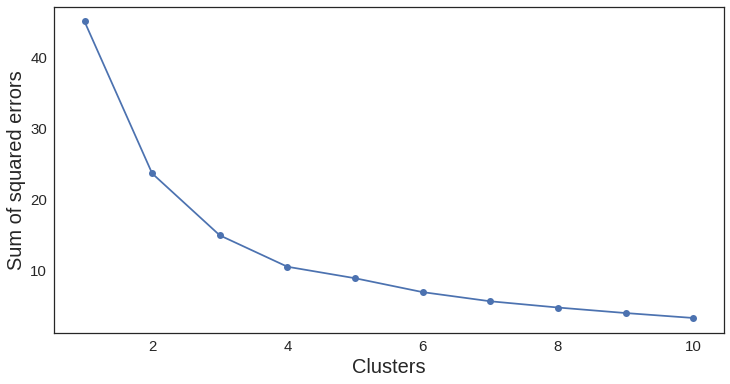

In [47]:
sns.set(style="white")
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.tick_params(labelsize=15)

plt.xlabel("Clusters", fontsize=20)
plt.ylabel("Sum of squared errors", fontsize=20)

In [0]:
kmeans = KMeans(n_clusters=8)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [0]:
transformed['cluster'] = clusters
transformed['name'] = names
transformed.columns = ['x','y','cluster','name']

In [50]:
transformed[:3]

,x,y,cluster,name
0,2.015487,-3.151162e-01,4,Cristiano Ronaldo
1,-0.000000,1.650359e-16,0,L. Messi
2,0.508833,-7.000290e-01,3,Neymar


In [51]:
#from vapeplot import vapeplot
!pip install vapeplot

  Running setup.py bdist_wheel for vapeplot ... - done
  Stored in directory: /root/.cache/pip/wheels/5e/f5/95/d4cd5d6af4055b9adc70ff5860e557d58f0b3bdab1f7e0362a
Successfully built vapeplot


In [52]:
!pip install adjustText

  Running setup.py bdist_wheel for adjustText ... - done
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [0]:
from vapeplot import vapeplot
from adjustText import adjust_text

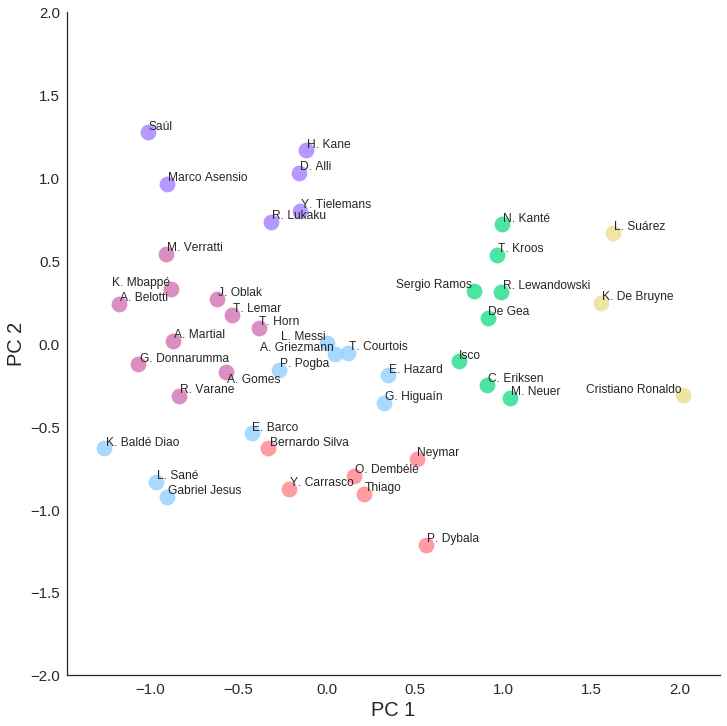

In [58]:
sns.set(style="white")
pal =  sns.blend_palette(vapeplot.palette('vaporwave'))

ax = sns.lmplot(x="x", y="y",hue='cluster', data=transformed, legend=False,
                   fit_reg=False, size =10, scatter_kws={"s": 250}, palette=pal)

texts = []
for x, y, s in zip(transformed.x, transformed.y, transformed.name):
    texts.append(plt.text(x, y, s))
adjust_text(texts) , #arrowprops=dict(arrowstyle="->", color='r', lw=0.5))  # uncomment to add arrows to labels

#ax._legend.set_title(prop={fontsize:'15'})
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
#plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)

plt.show()
# ax.savefig("newc_man_kmeans.jpg")

In [0]:
data['Preferred Positions'].unique()

In [0]:
st=data.groupby(['Preferred Positions']).get_group('ST')
lw=data.groupby(['Preferred Positions']).get_group('LW')
rw=data.groupby(['Preferred Positions']).get_group('RW')
gk=data.groupby(['Preferred Positions']).get_group('GK')
cdm=data.groupby(['Preferred Positions']).get_group('CDM')
cb=data.groupby(['Preferred Positions']).get_group('CB')
rm=data.groupby(['Preferred Positions']).get_group('RM')
cm=data.groupby(['Preferred Positions']).get_group('CM')
lm=data.groupby(['Preferred Positions']).get_group('LM')
lb=data.groupby(['Preferred Positions']).get_group('LB')
cam=data.groupby(['Preferred Positions']).get_group('CAM')
rb=data.groupby(['Preferred Positions']).get_group('RB')
cf=data.groupby(['Preferred Positions']).get_group('CF')
rwb=data.groupby(['Preferred Positions']).get_group('RWB')
lwb=data.groupby(['Preferred Positions']).get_group('LWB')


In [0]:
x = data.iloc[:, np.arange(37)].values
x
